# Polynomial regression 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv("house.csv")

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
X = df[["sqft_living"]]
y = df["price"]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
lr.score(X_test,y_test)

0.5030774643470592

In [12]:
y_pred = lr.predict(X_test)

In [13]:
r2_score(y_test,y_pred)

0.5030774643470592

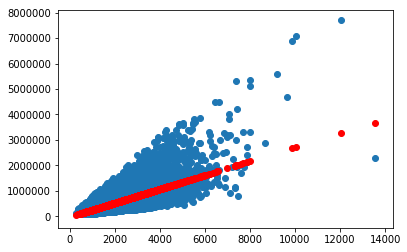

In [14]:
plt.figure()
plt.scatter(X,y)
plt.scatter(X_test,y_pred,color="red")
plt.show()

In [15]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
def poly_reg(n):
    pf = PolynomialFeatures(n)
    X_poly = pf.fit_transform(X)
    X_train_poly,X_test_poly,y_train,y_test = train_test_split(X_poly,y,test_size=0.3,random_state=1)
    lr = LinearRegression()
    lr.fit(X_train_poly,y_train)
    y_pred_poly = lr.predict(X_test_poly)
    print("degree:",i,"\nscore:",lr.score(X_test_poly,y_test))
    plt.figure()
    plt.scatter(X,y)
    plt.scatter(X_test,y_pred_poly,color="red")
    plt.show()

degree: 2 
score: 0.5311574735206874


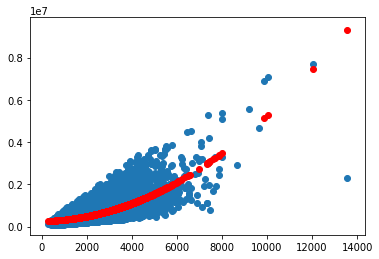

degree: 3 
score: 0.5401886537777041


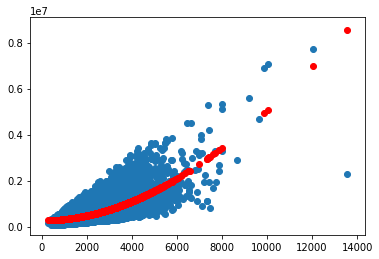

degree: 4 
score: 0.4921329968254815


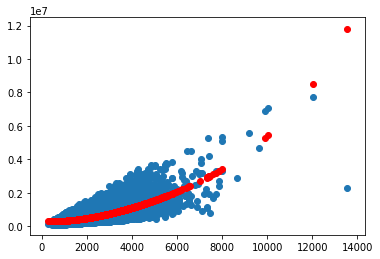

In [25]:
for i in range(2,5):
    poly_reg(i)

### Model score increases with higher value of polynomial degree, but starts reducing at n=4 due to overfitting.

### But increase in model score is not so significant. 